In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
%matplotlib inline

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

In [2]:
# importing the data frame
df = pd.read_csv('../analysis-dfs/full-df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# Data Cleaning

Before begining th data cleaning process I will first divide the data fram into a training and testing set. This will prevent data leakage.

In [3]:
X = df.drop('status_group', axis=1)
y = df.status_group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=21)

In [4]:
print(f"X_train has {X_train.shape[1]} columns and {X_train.shape[0]} rows")
print(f"X_test has {X_test.shape[1]} columns and {X_test.shape[0]} rows")

X_train has 40 columns and 41580 rows
X_test has 40 columns and 17820 rows


## Converting all strings to lower case and stripping whitespaces to avoids similar names being treated as different categories

In [5]:
X_train_cleaned = X_train.applymap(lambda x: x.lower().strip() if type(x) == str else  x)

## Dealing with Null Values

In [6]:
# function for checking  null values in a given train set
def null_identifier(set):
    null_values = set.isna().sum().to_frame()
    null_values.columns = ['Nulls']
    null_values = null_values[null_values['Nulls'] != 0]

    return null_values.sort_values('Nulls', ascending=False) # returning a sorted null value counts.

null_identifier(X_train)

,Nulls
scheme_name,19731
scheme_management,2687
installer,2560
funder,2543
public_meeting,2358
permit,2135
subvillage,260


#### scheme_name

In [7]:
# Scheme name is the name given to a particula well, statistically this has no effect to the target column hence I will drop it.
X_train_cleaned = X_train_cleaned.drop('scheme_name', axis=1)
null_identifier(X_train_cleaned)

,Nulls
scheme_management,2687
installer,2560
funder,2543
public_meeting,2358
permit,2135
subvillage,260


##### scheme_management

In [8]:
#  will drop this column since ther exist a column named 'managed_group' which provides more clear information.
X_train_cleaned = X_train_cleaned.drop('scheme_management', axis=1)
null_identifier(X_train_cleaned)

,Nulls
installer,2560
funder,2543
public_meeting,2358
permit,2135
subvillage,260


#### installer

In [9]:
# replacing the null values in installer with 'not known'
X_train_cleaned.installer = X_train_cleaned.installer.fillna('unknown')
display(X_train_cleaned.installer.isna().sum())

# displaying the next null values
null_identifier(X_train_cleaned)

0

,Nulls
funder,2543
public_meeting,2358
permit,2135
subvillage,260


#### funder

In [10]:
#  replacing funder null values with 'not known'
X_train_cleaned.funder = X_train_cleaned.funder.fillna('not known')
display(X_train_cleaned.funder.isna().sum())
null_identifier(X_train_cleaned)

0

,Nulls
public_meeting,2358
permit,2135
subvillage,260


#### public_meeting

In [11]:
# This is an irrelevant column hence I will drop it - no way a public meeting has an effect on the condition of a well
X_train_cleaned.drop('public_meeting', axis=1, inplace=True)

null_identifier(X_train_cleaned)

,Nulls
permit,2135
subvillage,260


#### permit

In [12]:
# replacing the null values with the mode  
permit_mode = X_train_cleaned.permit.mode() # checking the most repeated values

In [13]:
# replacing null values in the permit column with True
X_train_cleaned.permit = X_train_cleaned.permit.fillna(permit_mode)
null_identifier(X_train_cleaned)

,Nulls
permit,2135
subvillage,260


#### subvillage

In [14]:
#  will drop this column since already there are longittude and latitudes which describe th geographical postion of a water point
X_train_cleaned.drop('subvillage', axis=1, inplace=True)

null_identifier(X_train_cleaned)

,Nulls
permit,2135


Dealing with null values are done now!!

In [15]:
# displaying the cleaned dataset
display(X_train_cleaned.head(10))
X_train_cleaned.shape

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
9467,43656,0.0,2013-01-28,kidep,1388,dwe,30.818893,-3.038144,kwa onesmo,0,...,unknown,unknown,unknown,unknown,unknown,spring,spring,groundwater,communal standpipe,communal standpipe
38102,12614,0.0,2013-03-02,world bank,1319,water board,36.835439,-5.924340,ndotoi,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
8482,55254,0.0,2013-01-28,district council,412,district water department,39.002814,-10.251765,kaimba,0,...,unknown,unknown,unknown,unknown,unknown,spring,spring,groundwater,communal standpipe,communal standpipe
58228,56447,100.0,2013-02-19,padep,1513,water board,36.444793,-5.623619,makulu,0,...,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
27402,58566,0.0,2013-01-11,not known,1599,unknown,34.864805,-4.664021,ilongero a level,0,...,unknown,unknown,unknown,dry,dry,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
33200,37961,0.0,2011-04-04,not known,0,unknown,34.259018,-8.614604,kwa funjiro,0,...,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe
55573,73783,0.0,2011-02-26,kkkt,2036,commu,34.225502,-9.354233,none,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
38531,62448,50.0,2011-04-13,dh,0,dh,37.136928,-6.196204,mbuyuni,0,...,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
44389,54023,600.0,2013-02-04,fini water,-8,fini water,39.991995,-10.320051,kwa namwelenu,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
52274,73681,0.0,2012-10-15,dwe,0,dwe,31.492994,-5.497778,mama karita,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


(41580, 36)

## Dealing with outliers

From EDA the following columns showed signs of having outliers:
* longitude
* population

In [16]:
X_train_cleaned[['longitude', 'population']].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,41580.0,34.086534,6.584177,0.0,33.095987,34.911604,37.205995,40.344301
population,41580.0,181.643891,492.347293,0.0,0.000000,25.000000,215.250000,30500.000000


In [17]:
# function for returning the number of outliers column.
def outliers(set, column, iqr=True):
    # using IQR to determine outliers.
    if (iqr):
        q1 = set[column].quantile(.25)
        q3 = set[column].quantile(.75)

        iqr = q3 - q1
        outliers = list( set[ (set[column]<(q1-1.5*iqr)) | (set[column]>(q1+1.5*iqr))][column] )

    else:
        temp_df = set.copy()
        temp_df['temp_col'] = temp_df[column]
        temp_df['temp_col'] = temp_df['temp_col'].apply(lambda x: (x-temp_df['temp_col'].mean())/temp_df['temp_col'].std() )
        outliers = list( temp_df[ (temp_df['temp_col'] <= -3) & (temp_df['temp_col'] >= 3) ].drop('temp_col', axis=1) )

    return len(outliers), outliers

In [18]:
# function for removing outliers given a certain set and column
def outliers_remover(set, column, iqr=True):
    # using IQR to determine outliers.

    if (iqr):
        q1 = set[column].quantile(.25)
        q3 = set[column].quantile(.75)

        iqr = q3 - q1
        result = set[ (set[column]>(q1 - 1.5*iqr)) & (set[column]<(q3 + 1.5*iqr)) ]


    
    # using z-score to remove outliers
    else:
        temp_df = set.copy()
        temp_df['temp_column'] = temp_df[column]
        temp_df['temp_column'] = temp_df['temp_column'].apply(lambda x: (x-temp_df['temp_column'].mean())/temp_df['temp_column'].std() )
        result = temp_df[ (temp_df['temp_column'] >= -3) & (temp_df['temp_column'] <= 3) ]
        result.drop('temp_column', axis=1, inplace=True)
    
    
    return result

#### longitude

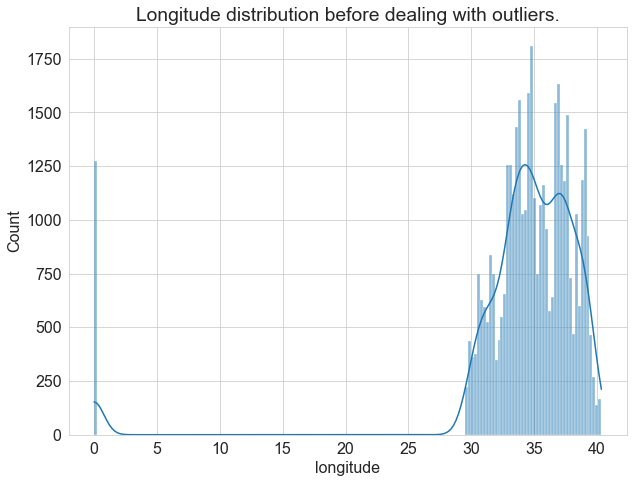

In [19]:
# plotting the distribution before working on the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.longitude, ax=ax, kde=True)
plt.title('Longitude distribution before dealing with outliers.')
plt.show()

In [20]:
# finding the number of ouliers in the longitude column.
longitude_outliers_no, longitude_outliers = outliers(X_train_cleaned, 'longitude')
longitude_outliers_no

2774

In [21]:
# theses outliers are many to drop, maybe replacing them with median of the longitudes will
longitudes_median = X_train_cleaned.longitude.median()
longitudes_median

34.911603525000004

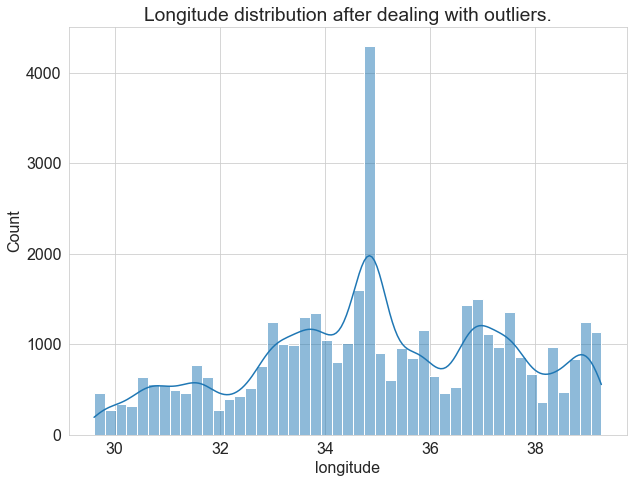

In [22]:
# Replacing the outliers in the longitude field with the median
X_train_cleaned.longitude = X_train_cleaned.longitude.apply(lambda x: longitudes_median if x in longitude_outliers else x)

# plotting the distribution after removing the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.longitude, ax=ax, kde=True)
plt.title('Longitude distribution after dealing with outliers.')
plt.show()

#### population

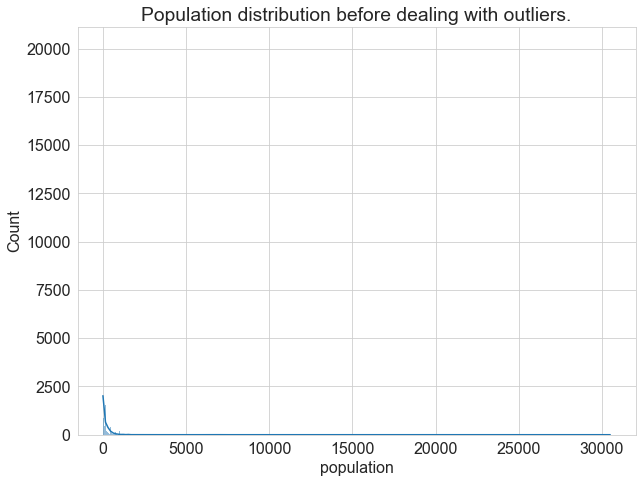

In [23]:
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.population, ax=ax, kde=True)
plt.title('Population distribution before dealing with outliers.')
plt.show()

Before dealing with any outliers the population column seems to be  filled with very less population numbers, hence any population less than the median will be replaced with the median.

In [24]:
# finding the median in the population column
median_pop = X_train_cleaned.population.median()
X_train_cleaned.population = X_train_cleaned.population.apply(lambda x: median_pop if x<median_pop else x)
len( X_train_cleaned[X_train_cleaned.population < median_pop] ) # checking if the function worked

0

In [25]:
# finding the number of ouliers in the population column.
population_outliers_no, population_outliers = outliers(X_train_cleaned, 'population', iqr=False)
population_outliers_no

36

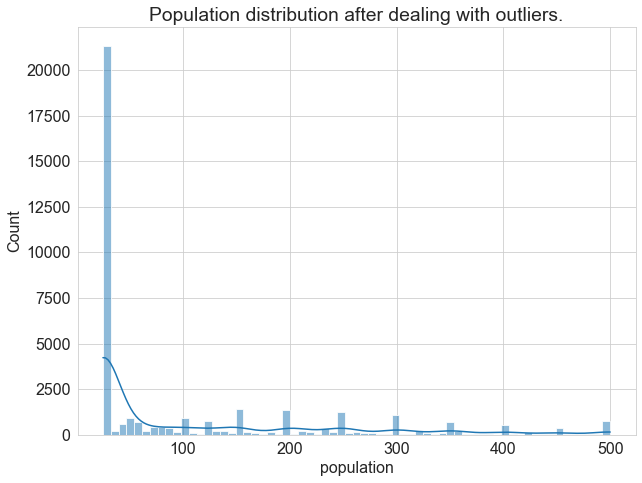

In [26]:
# Removing all the outliers in the population column.
# For this I will use z-score since population seems to follow a normal distribution.
X_train_cleaned = outliers_remover(X_train_cleaned, 'population')

# plotting the distribution after removing the outliers
fig, ax = plt.subplots(figsize=(10,7.5))
sns.histplot(data=X_train_cleaned.population, ax=ax, kde=True)
plt.title('Population distribution after dealing with outliers.')
plt.show()

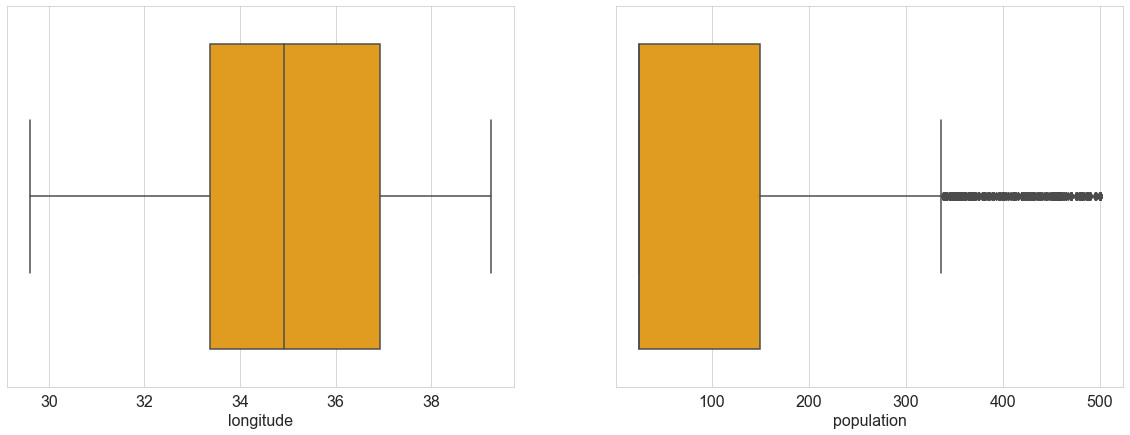

In [27]:
#  checking the distribution once more after removing outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.boxplot(x=X_train_cleaned.longitude, ax=ax[0], color='orange')
sns.boxplot(x=X_train_cleaned.population, ax=ax[1], color='orange')
plt.show()

The population column still show signs of outliers, But better than the intial hence will go on using this one

In [28]:
# desribing the new cleaned set
X_train_cleaned[['longitude', 'population']].describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,38326.0,35.000686,2.377778,29.610965,33.36863,34.911604,36.932973,39.2608
population,38326.0,106.821818,125.752968,25.000000,25.00000,25.000000,150.000000,500.0000


## Dropping irrelevant columns

In [29]:
# displaying a list of the remaining columns
list(X_train_cleaned.columns)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'recorded_by',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

Some of the columns are redundant (meaning they display information present in another column) and other seem not to provide any useful information at all. Hence in this section I will be dropping these columns.
These columns are:
* id - this is a unique identifier hence has no effect on the condtion of water point.
* amount_tsh - from EDA it was spotted that this column contains lot's of zeros and filled with outliers which would become quite stressful to solve.
* data_recorded - the date recorded has no effect on the condition of a well.
* funder - the column installer displays more information than the funder column, just by facts one who funds the well cannot have any effect on the condition of well it is most likely the installer.
* wpt_name - a water name has no effect its condtion.
* management - all these information is summarized in the management group.
* quantity - same information is in the quantity group.
* num_private - this column seems not to be providing any useful information at all.
* sub_village - already there is longitude and latitude which show the location of a place.
* region - region_code does a better job in describing the location of a place, since it is numerical.
* lga, ward - already there are longitude, latitude, region_code, district_code and a nearby water basin which show the location of a place
* recorded_by - not useful info since it is only GeoData Consultants Ltd who did the recordings
* extraction_type and extraction_type_group - all this are redundant, extraction_type_class displays more information.
* payment_type - this is a repetition of the payment column.
* water_quality - similar information is in the water quality group
* source, source_type - all these columns are summarized in the source_class column
* waterpoint_type - same information is in the water_type_group

In [30]:
columns_to_drop = ['id', 'amount_tsh', 'date_recorded', 'funder', 'num_private', 'region', 'lga', 'ward', 'recorded_by', 'wpt_name', 'management', 'quantity', 'extraction_type', 'extraction_type_group', 'payment_type', 'water_quality', 'source', 'source_type', 'waterpoint_type']
# dropping these columns
X_train_cleaned.drop(columns_to_drop, axis=1, inplace=True)

In [31]:
# Displaying the new set
X_train_cleaned.head(10)

,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type_group
9467,1388,dwe,30.818893,-3.038144,lake tanganyika,16,1,80.0,False,1993,gravity,unknown,unknown,unknown,unknown,groundwater,communal standpipe
38102,1319,water board,36.835439,-5.924340,wami / ruvu,21,5,25.0,True,2009,submersible,user-group,never pay,good,enough,groundwater,communal standpipe
8482,412,district water department,39.002814,-10.251765,ruvuma / southern coast,80,53,350.0,True,1974,gravity,unknown,unknown,unknown,unknown,groundwater,communal standpipe
27402,1599,unknown,34.864805,-4.664021,internal,13,2,25.0,NaN,2000,other,user-group,unknown,unknown,dry,surface,communal standpipe
33200,0,unknown,34.259018,-8.614604,rufiji,12,7,25.0,True,0,gravity,user-group,never pay,good,seasonal,surface,communal standpipe
55573,2036,commu,34.225502,-9.354233,lake nyasa,11,3,25.0,False,2000,gravity,user-group,never pay,good,enough,groundwater,communal standpipe
38531,0,dh,37.136928,-6.196204,wami / ruvu,5,1,227.0,True,1984,submersible,user-group,pay per bucket,salty,insufficient,groundwater,communal standpipe
44389,-8,fini water,34.911604,-10.320051,ruvuma / southern coast,99,1,400.0,True,1985,handpump,user-group,pay monthly,good,enough,groundwater,hand pump
52274,0,dwe,31.492994,-5.497778,lake tanganyika,14,4,25.0,True,0,handpump,user-group,never pay,good,enough,groundwater,hand pump
15858,1138,tcrs,31.226761,-6.339421,lake rukwa,15,1,150.0,True,1975,gravity,commercial,never pay,good,insufficient,groundwater,communal standpipe


In [32]:
X_train_cleaned.shape

(38326, 17)

## Investigating any abnormality in the numbers of the columns

In [33]:
X_train_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
gps_height,38326.0,644.410922,695.488227,-63.000000,0.000000,330.000000,1309.000000,2.770000e+03
longitude,38326.0,35.000686,2.377778,29.610965,33.368630,34.911604,36.932973,3.926080e+01
latitude,38326.0,-5.695937,2.964056,-11.649440,-8.612952,-5.010909,-3.317778,-2.000000e-08
region_code,38326.0,14.896572,17.092846,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,38326.0,5.530188,9.363621,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,38326.0,106.821818,125.752968,25.000000,25.000000,25.000000,150.000000,5.000000e+02
construction_year,38326.0,1246.445155,967.155838,0.000000,0.000000,1984.000000,2004.000000,2.013000e+03


#### construction_year

In [34]:
#  checking the years present int the dataset
np.sort(X_train_cleaned.construction_year.unique())

array([   0, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

It come deduced that some recored have 0 as a year. I'll carry further analysis to see whats's up with them

In [35]:
len(X_train_cleaned[X_train_cleaned.construction_year == 0])

14402

The number of years are too many for me to drop I will just replace them with 0

In [36]:
X_train_cleaned.construction_year = X_train_cleaned.construction_year.apply(lambda x: 'unknown' if x == 0 else x)
len(X_train_cleaned[X_train_cleaned.construction_year == 0])

0

#### district_code

Based on analysis done online Tanzania has no district code 0, hence records imputted with 0 as the district code could errors

In [37]:
# cheking the district codes present in the dataset
np.sort(X_train.district_code.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 13, 23, 30, 33, 43, 53, 60, 62,
       63, 67, 80])

In [38]:
len(X_train_cleaned[X_train_cleaned.district_code == 0])

18

Only 18 rows have district code 0. This are less hence dropping them won't be that much of an issue

In [39]:
X_train_cleaned = X_train_cleaned.loc[X_train_cleaned.district_code != 0]
len(X_train_cleaned[X_train_cleaned.district_code == 0])

0

In [40]:
# Reviewing the new cleaned set
display(X_train_cleaned.shape)
X_train_cleaned.head(10)

(38308, 17)

,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity_group,source_class,waterpoint_type_group
9467,1388,dwe,30.818893,-3.038144,lake tanganyika,16,1,80.0,False,1993,gravity,unknown,unknown,unknown,unknown,groundwater,communal standpipe
38102,1319,water board,36.835439,-5.924340,wami / ruvu,21,5,25.0,True,2009,submersible,user-group,never pay,good,enough,groundwater,communal standpipe
8482,412,district water department,39.002814,-10.251765,ruvuma / southern coast,80,53,350.0,True,1974,gravity,unknown,unknown,unknown,unknown,groundwater,communal standpipe
27402,1599,unknown,34.864805,-4.664021,internal,13,2,25.0,NaN,2000,other,user-group,unknown,unknown,dry,surface,communal standpipe
33200,0,unknown,34.259018,-8.614604,rufiji,12,7,25.0,True,unknown,gravity,user-group,never pay,good,seasonal,surface,communal standpipe
55573,2036,commu,34.225502,-9.354233,lake nyasa,11,3,25.0,False,2000,gravity,user-group,never pay,good,enough,groundwater,communal standpipe
38531,0,dh,37.136928,-6.196204,wami / ruvu,5,1,227.0,True,1984,submersible,user-group,pay per bucket,salty,insufficient,groundwater,communal standpipe
44389,-8,fini water,34.911604,-10.320051,ruvuma / southern coast,99,1,400.0,True,1985,handpump,user-group,pay monthly,good,enough,groundwater,hand pump
52274,0,dwe,31.492994,-5.497778,lake tanganyika,14,4,25.0,True,unknown,handpump,user-group,never pay,good,enough,groundwater,hand pump
15858,1138,tcrs,31.226761,-6.339421,lake rukwa,15,1,150.0,True,1975,gravity,commercial,never pay,good,insufficient,groundwater,communal standpipe


In [41]:
# exporting the cleaned  X_train
X_train_cleaned.to_csv('../analysis-dfs/X_train_cleaned.csv')

### Summarizing the whole data cleanin process in one function

In [42]:
def data_cleaner(temp_df):
    # converting to lower case and removing any trailing spaces
    temp_df_cleaned = temp_df.applymap(lambda x: x.lower().strip() if type(x) == str else  x)

    # dealing with null values
    # 1. scheme_name column
    temp_df_cleaned = temp_df_cleaned.drop('scheme_name', axis=1)
    # 2. scheme_management
    temp_df_cleaned = temp_df_cleaned.drop('scheme_management', axis=1)
    # 3. installer
    temp_df_cleaned.installer = temp_df_cleaned.installer.fillna('unknown')
    #  4. funder
    temp_df_cleaned.funder = temp_df_cleaned.funder.fillna('not known')
    # 5. public_meeting
    temp_df_cleaned.drop('public_meeting', axis=1, inplace=True)
    # 6. permit
    permit_mode = temp_df_cleaned.permit.mode()
    temp_df_cleaned.permit = temp_df_cleaned.permit.fillna(permit_mode)
    # 7. subvillage
    temp_df_cleaned.drop('subvillage', axis=1, inplace=True)

    # dealing with outliers
    # 1. longitude
    longitudes_median = temp_df_cleaned.longitude.median()
    temp_df_cleaned.longitude = temp_df_cleaned.longitude.apply(lambda x: longitudes_median if x in longitude_outliers else x)

    # 2.population
    median_pop = temp_df_cleaned.population.median()
    temp_df_cleaned.population = temp_df_cleaned.population.apply(lambda x: median_pop if x<median_pop else x)
    temp_df_cleaned = outliers_remover(temp_df_cleaned, 'population')

    # dropping irrelevant columns
    columns_to_drop = ['id', 'amount_tsh', 'date_recorded', 'funder', 'num_private', 'region', 'lga', 'ward', 'recorded_by', 'wpt_name', 'management', 'quantity', 'extraction_type', 'extraction_type_group', 'payment_type', 'water_quality', 'source', 'source_type', 'waterpoint_type']

    # dropping these columns
    temp_df_cleaned.drop(columns_to_drop, axis=1, inplace=True)

    # abnormality
    # 1. construction year
    temp_df_cleaned.construction_year = temp_df_cleaned.construction_year.apply(lambda x: 'unknown' if x == 0 else x)
    # 2. district_code
    temp_df_cleaned = temp_df_cleaned.loc[temp_df_cleaned.district_code != 0]

    return temp_df_cleaned

In [43]:
X_test_cleaned = data_cleaner(X_test)

In [45]:
# exporting the cleaned X_test 
X_test_cleaned.to_csv('../analysis-dfs/X_test_cleaned.csv')